### Sklearn实现SVM3（高斯核） 

In [1]:
# 导入包
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle

In [1]:
# 加载数据
def loadDataSet(fileName):
    dataMat = []
    labelMat = []

    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]),float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

X,y = loadDataSet('./data/svm2.txt')
print(X[0:5])
print(y[0:5])

[[-0.214824, 0.662756], [-0.061569, -0.091875], [0.406933, 0.648055], [0.22365, 0.130142], [0.231317, 0.766906]]
[-1.0, 1.0, -1.0, 1.0, -1.0]


In [3]:
model = SVC(C=1,kernel='linear')
model.fit(X,y)
b = model.intercept_
w = model.coef_
print("b=",b)
print("w=",w)

b= [-3.83775658]
w= [[ 0.81444269 -0.27274371]]


In [4]:
# 预测
model.predict(np.array([[7.8862,0.1918]]))

array([1.])

In [12]:
# 模型其他相关属性

print('各类别各有多少个支持向量',model.n_support_) # 列表形式，每个元素对应每个类别
print('各类别支持向量在训练样本中的索引',model.support_) 
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的alpha值',model.dual_coef_) # 与上一行的支持向量一一对应


各类别各有多少个支持向量 [2 1]
各类别支持向量在训练样本中的索引 [17 29 55]
各类所有的支持向量 [[ 4.658191  3.507396]
 [ 3.457096 -0.082216]
 [ 6.080573  0.418886]]
支持向量的alpha值 [[-0.12746518 -0.24133564  0.36880082]]


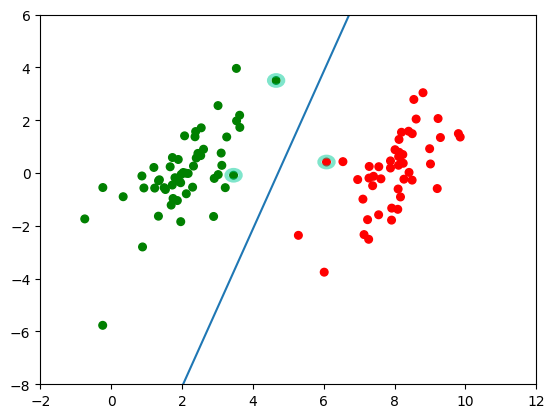

In [19]:
# 通过支持向量索引这一属性，绘制支持向量
fig = plt.figure()
ax = fig.add_subplot(111)
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
ax.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)

# 决策平面: wx + b = w0x0 + w1x1 + b = 0
x0 = np.arange(-2.0,12.0,0.1)
x1 = (-w[0][0]*x0 - b) / w[0][1]
ax.plot(x0,x1.reshape(-1,1))

# 绘制支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0],X[i][1]),0.2,facecolor='none',edgecolor=(0,0.8,0.6),linewidth=3,alpha=0.5)
    ax.add_patch(circle)

ax.axis([-2,12,-8,6])
plt.show()